<a href="https://colab.research.google.com/github/Mrinal19/Representation-Learning/blob/main/HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving snorlax.jpg to snorlax (2).jpg


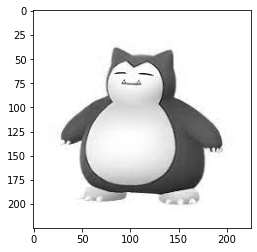

In [ ]:
import numpy as np
import skimage. color
import matplotlib.pyplot as plt
import skimage.io
import math
import cv2


from google.colab import files
uploaded = files.upload()
# load the image
grayscale_image = skimage.io.imread(fname ='snorlax.jpg', as_gray = True)
# display the image
fig, ax = plt.subplots()
x = plt.imshow(grayscale_image, cmap ="gray")
plt.show()

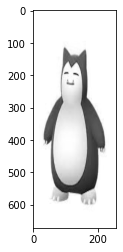

In [ ]:
# resizing image
resized = cv2.resize(grayscale_image, (4*64, 4*168))
plt.imshow(resized, cmap ="gray")
plt.show()

In [ ]:
#creating hog features 
from skimage.feature import hog
fed, hog_img = hog(resized, orientations=9, pixels_per_cell=(8, 8), 
                     cells_per_block=(2, 2), visualize=True)
fed.shape

(92628,)

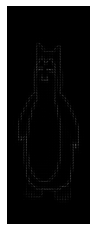

(672, 256)
pixel intensity [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
plt.axis ( "off" )
plt.imshow(hog_img, cmap="gray")
plt.show()
print(hog_img.shape)
print('pixel intensity',hog_img)

In [ ]:
import numpy as np
from skimage.transform import resize

Gx = np.array([[-1.0, 0.0, 1.0]])
Gy = np.array([[-1.0], [0.0], [1.0]])
[rows, columns] = np.shape(resized)
hog_mag_image	= np.zeros(shape=(rows, columns))
hog_angle_image	= np.zeros(shape=(rows, columns))

#Calculating gradients
gx = cv2.filter2D(resized, -1, Gx) 
gy = cv2.filter2D(resized, -1, Gy)

g_mag = np.sqrt(np.square(gx) + np.square(gy))
hog_angle_image = np.arctan(gy/gx) 
print(hog_angle_image)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


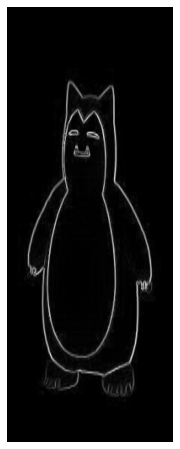

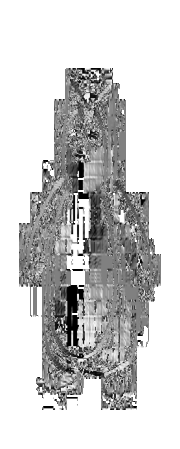

In [ ]:
#gradient magnitude 
plt.figure(figsize=(15, 8)) 
plt.imshow(g_mag, cmap='gray') 
plt.axis("off")
plt.show()

# gradient angle 
plt.figure(figsize=(15, 8)) 
plt.imshow(hog_angle_image, cmap='gray') 
plt.axis("off")
plt.show()

#histogram
hog_angle_abs = np.abs(hog_angle_image) 
hog_deg_image = np.degrees(hog_angle_abs) 
x = hog_deg_image.flatten()

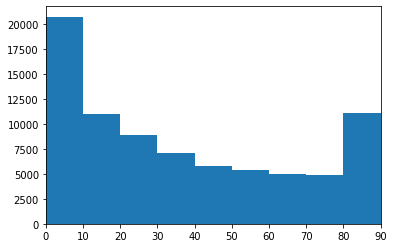

In [ ]:

plt.hist(x, bins=9) 
plt.xlim([0,90]) 
plt.show()